# Catbot : Chatbot Cat Health Diagnosis

**NOTE: TAMBAHIN DATASET BUAT RINGWORM SAMA ACNE BIA JADI 25 AN**

## IMPORT

GPU Hardware Accelerator

In [1]:
!nvidia-smi

Sat Nov 23 23:09:54 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 ...  WDDM  |   00000000:02:00.0 Off |                  N/A |
| N/A   57C    P8              3W /   30W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

d:\CODE\GitHub-Repositories\Clones\capstone-catbot


In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.36  Python-3.12.7 torch-2.5.1+cpu CPU (Intel Core(TM) i5-10500H 2.50GHz)
Setup complete  (12 CPUs, 15.8 GB RAM, 91.6/227.5 GB disk)


Import ultralytics YOLO

In [4]:
from ultralytics import YOLO
from IPython.display import Image

Import dataset from yolo

In [5]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="iaufeQQuWRC7fxMouzRZ")
project = rf.workspace("catbot-capstone").project("catbot")
version = project.version(4)
dataset = version.download("yolov11")

Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...


In [6]:
dataset.location

'd:\\CODE\\GitHub-Repositories\\Clones\\capstone-catbot\\CatBot--4'

## Training

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=15 imgsz=640 device=gpu

Ultralytics 8.3.36 🚀 Python-3.12.7 torch-2.5.1+cpu CPU (Intel Core(TM) i5-10500H 2.50GHz)


  0%|          | 0.00/755k [00:00<?, ?B/s]
 17%|█▋        | 128k/755k [00:00<00:02, 300kB/s]
 34%|███▍      | 256k/755k [00:00<00:01, 424kB/s]
 68%|██████▊   | 512k/755k [00:00<00:00, 711kB/s]
100%|██████████| 755k/755k [00:00<00:00, 822kB/s]

train: Scanning D:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\train\labels...:   0%|          | 0/572 [00:00<?, ?it/s]
train: Scanning D:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\train\labels... 34 images, 0 backgrounds, 0 corrupt:   6%|▌         | 34/572 [00:00<00:01, 339.54it/s]
train: Scanning D:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\train\labels... 82 images, 0 backgrounds, 0 corrupt:  14%|█▍        | 82/572 [00:00<00:01, 418.48it/s]
train: Scanning D:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\train\labels... 147 images, 0 backgrounds, 0 corrupt:  26%|██▌       | 147/572 [00:00<00:00, 513.11it/s]
train: Scanning D:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\tr


engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=d:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torch

## Examine results

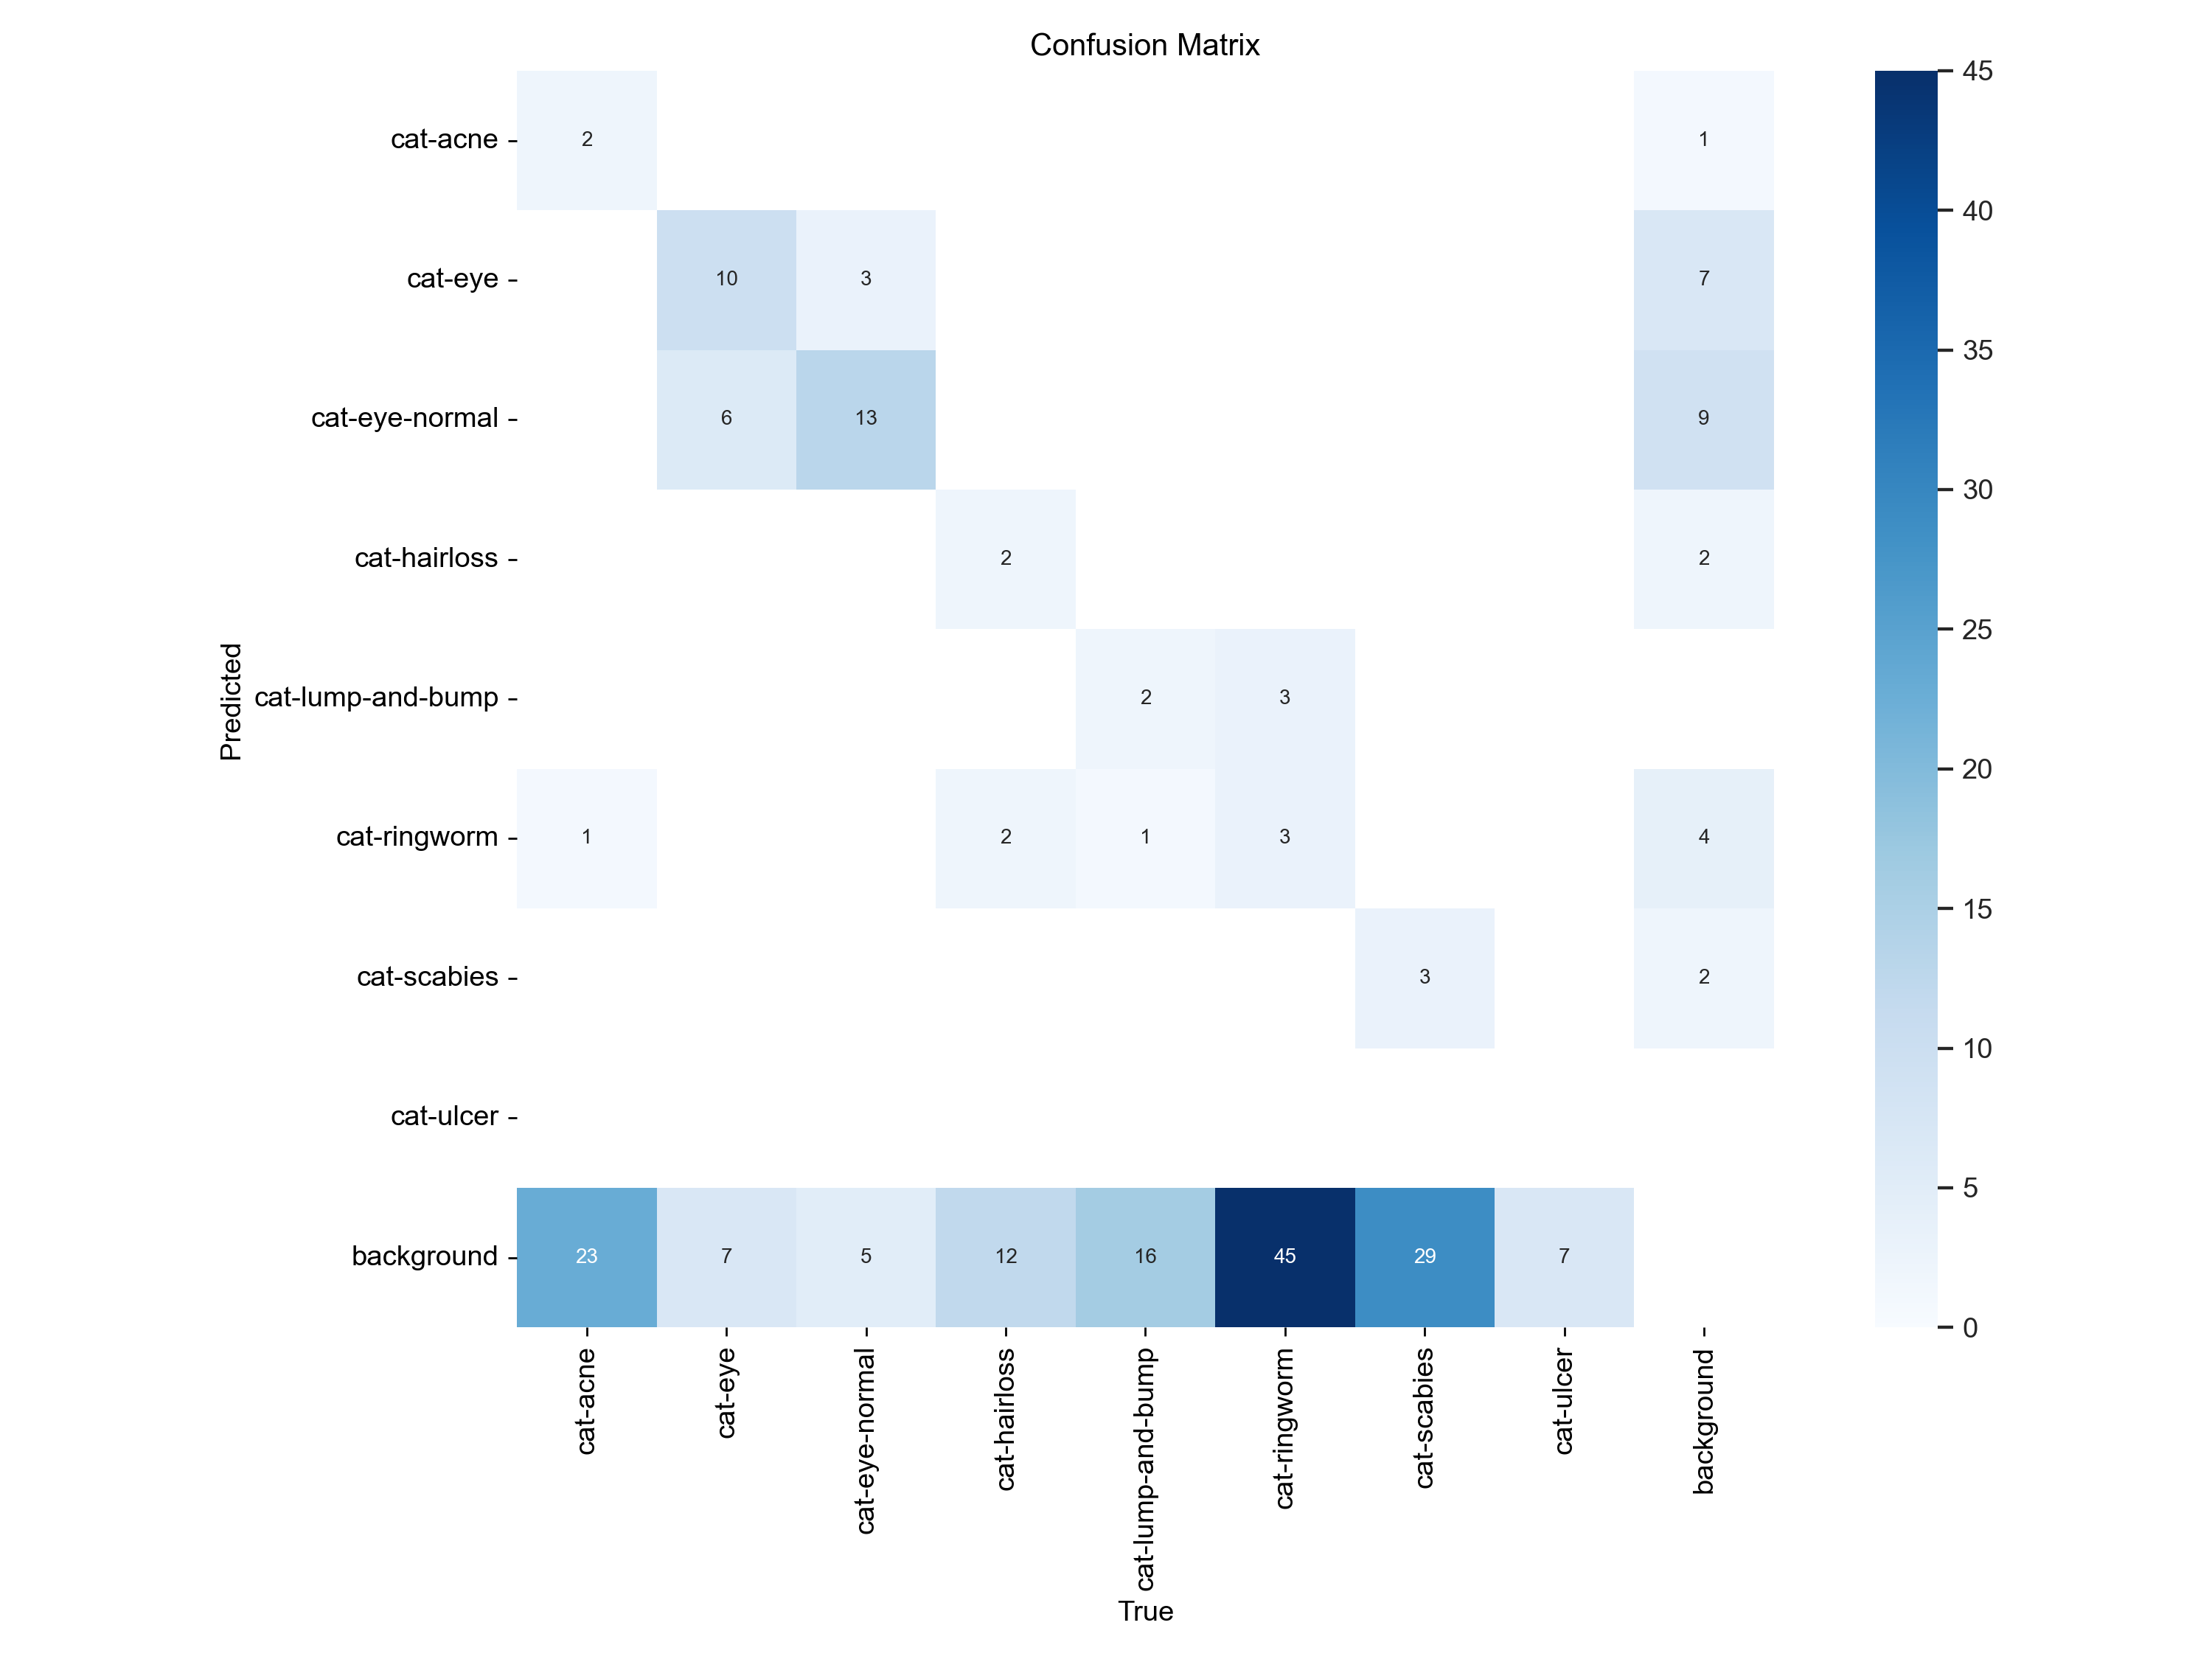

In [11]:
Image("runs/detect/train/confusion_matrix.png", width=1000)

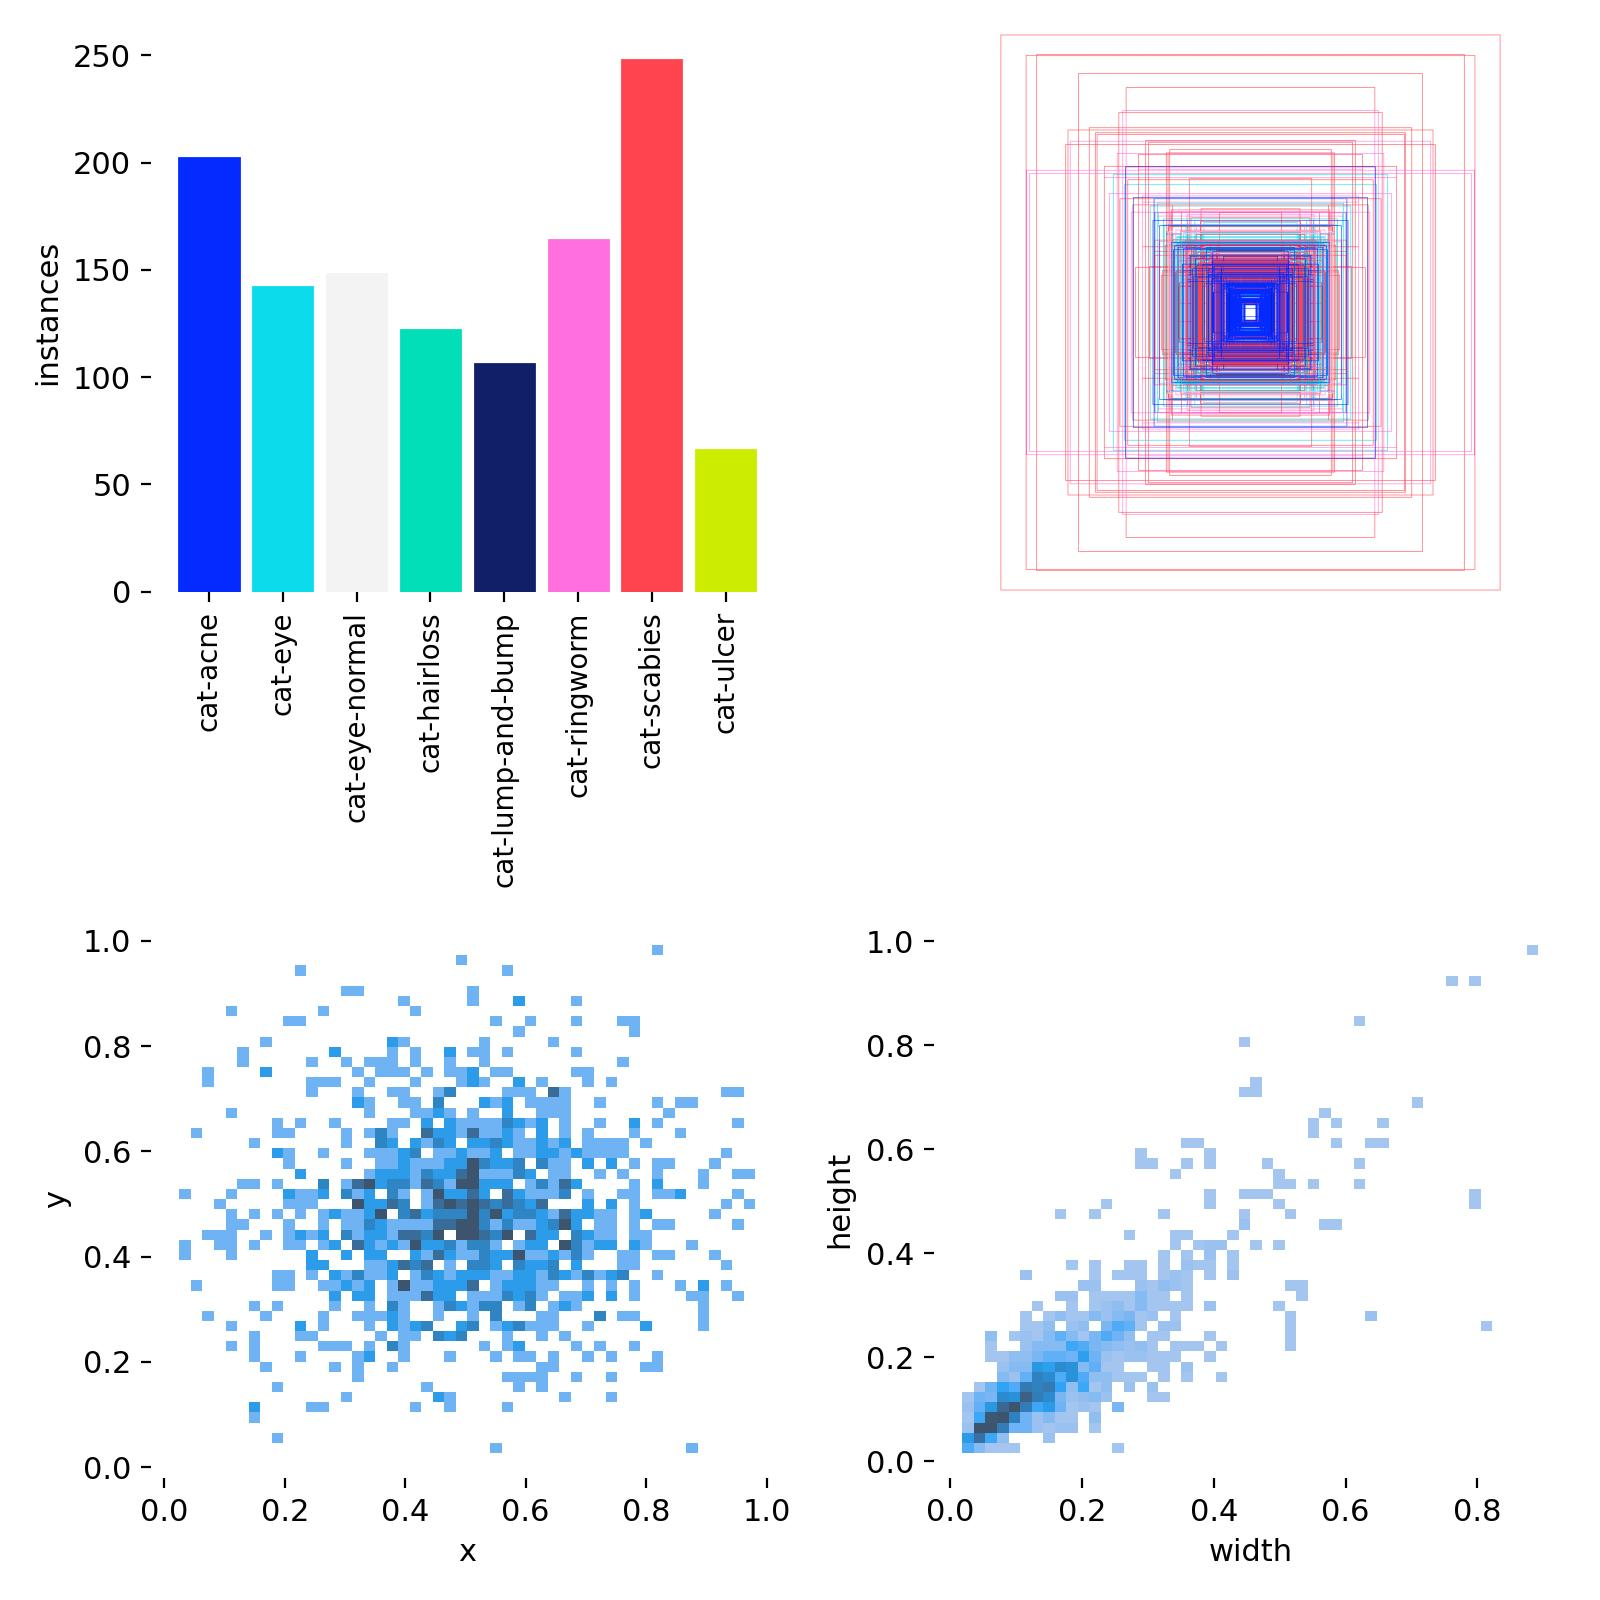

In [13]:
Image("runs/detect/train/labels.jpg", width=600)

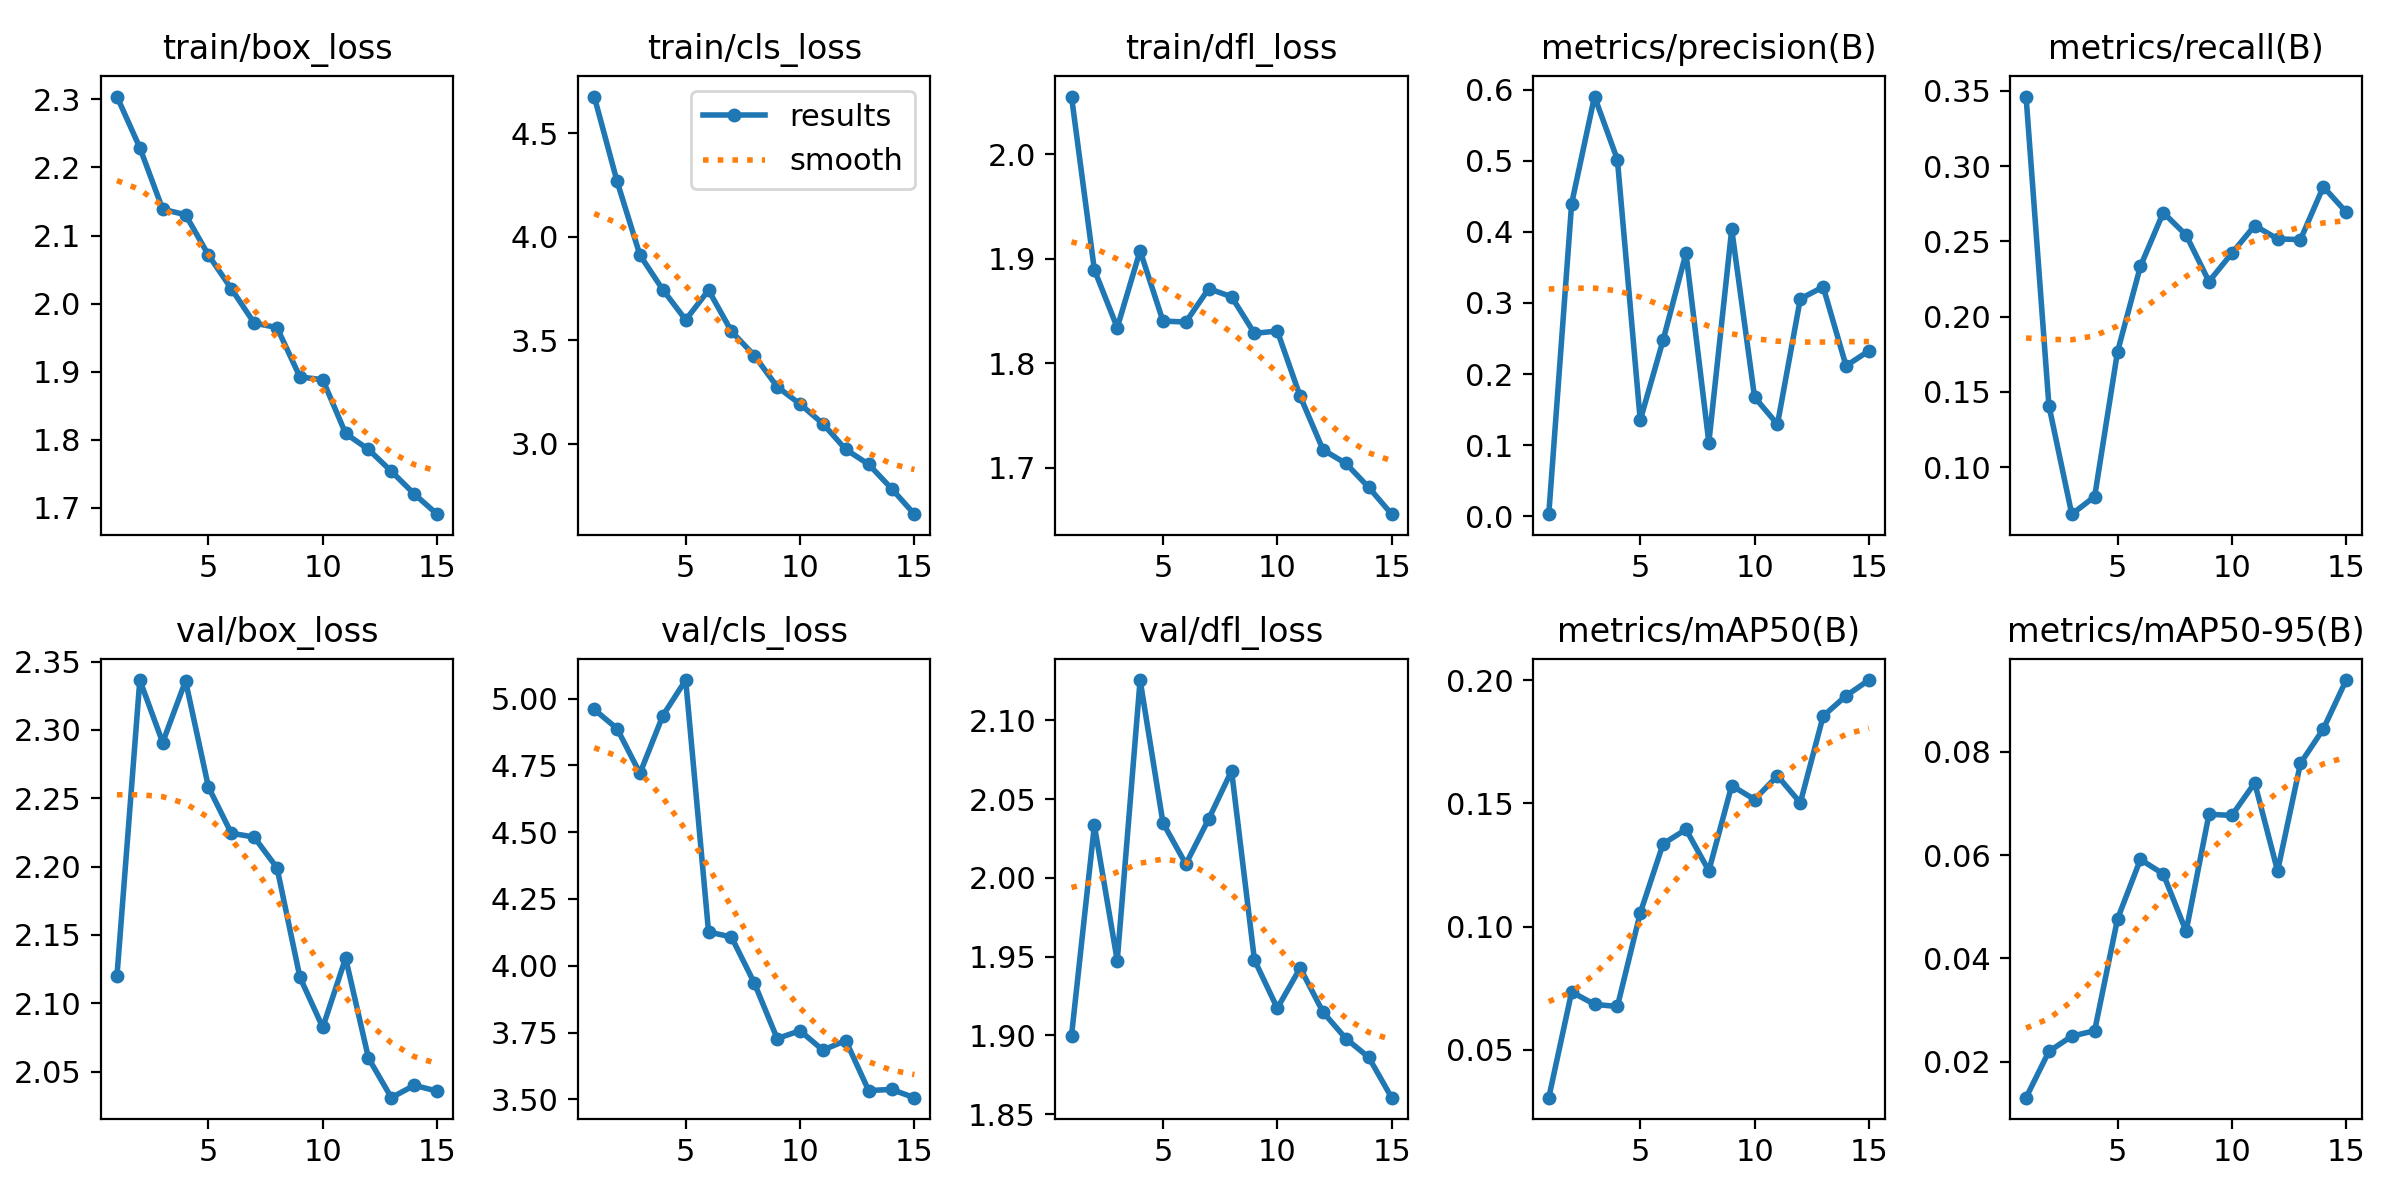

In [15]:
Image("runs/detect/train/results.png", width=1000)

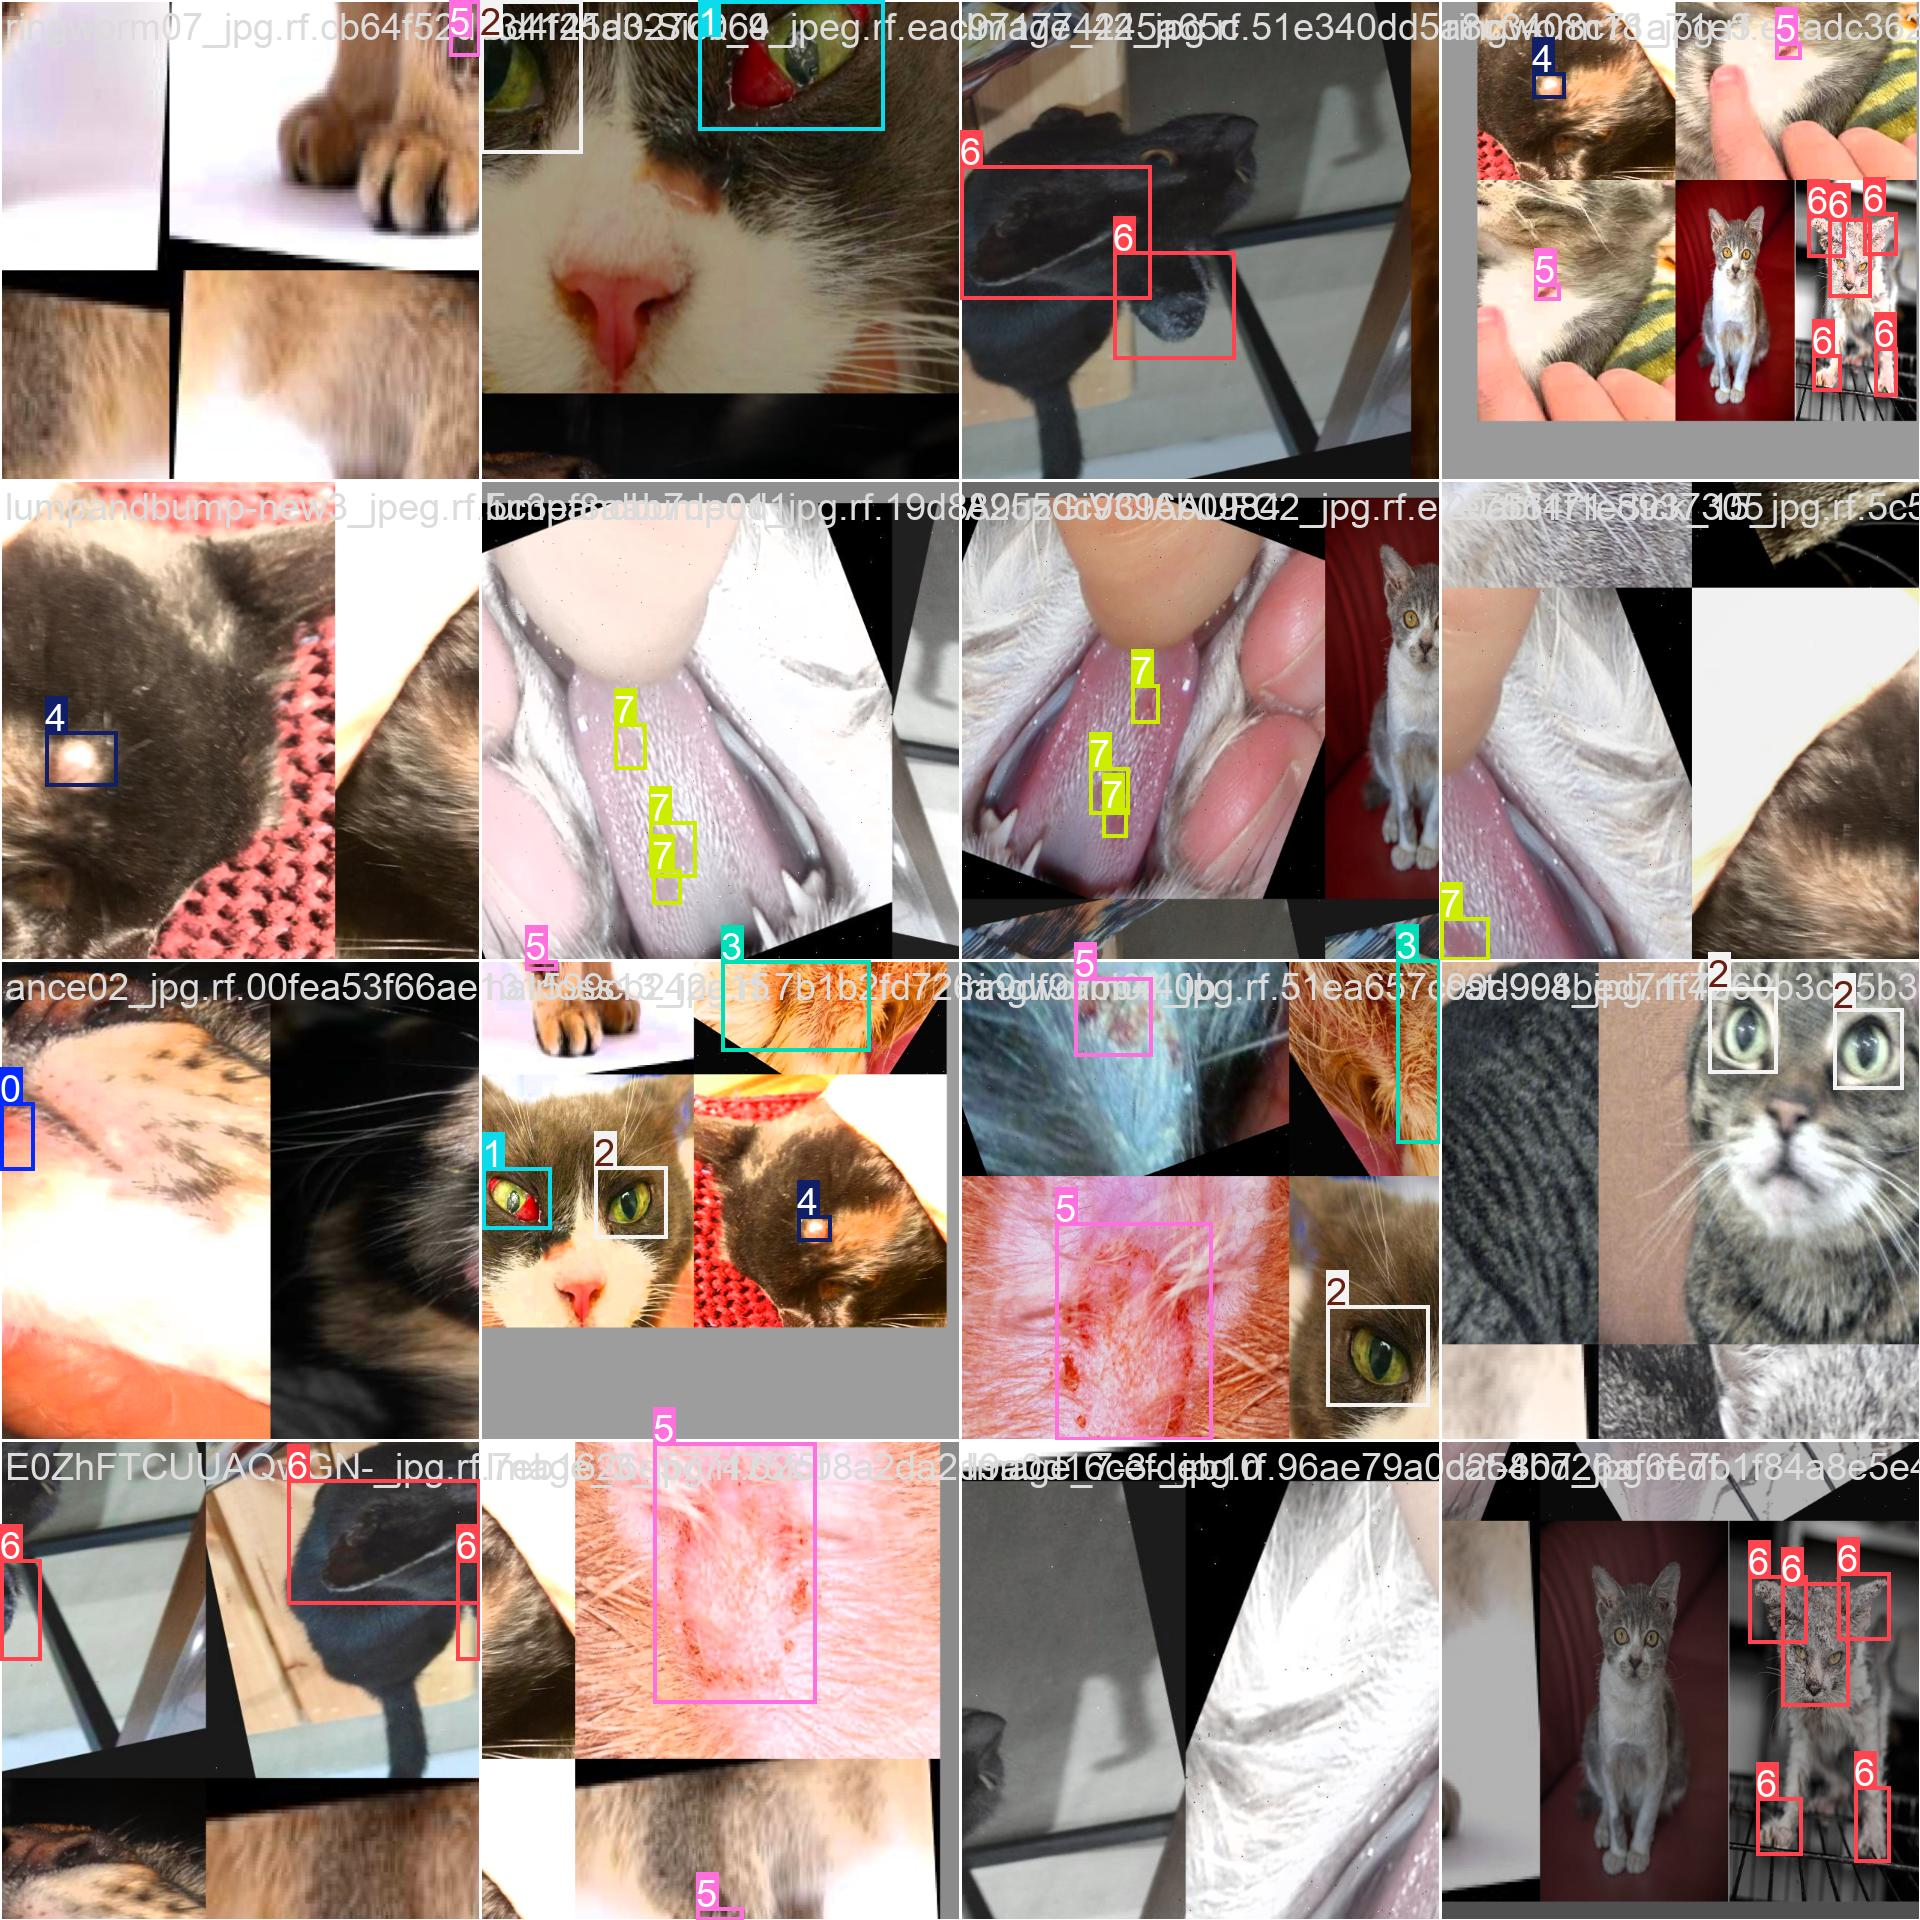

In [16]:
Image("runs/detect/train/train_batch0.jpg", width=600)

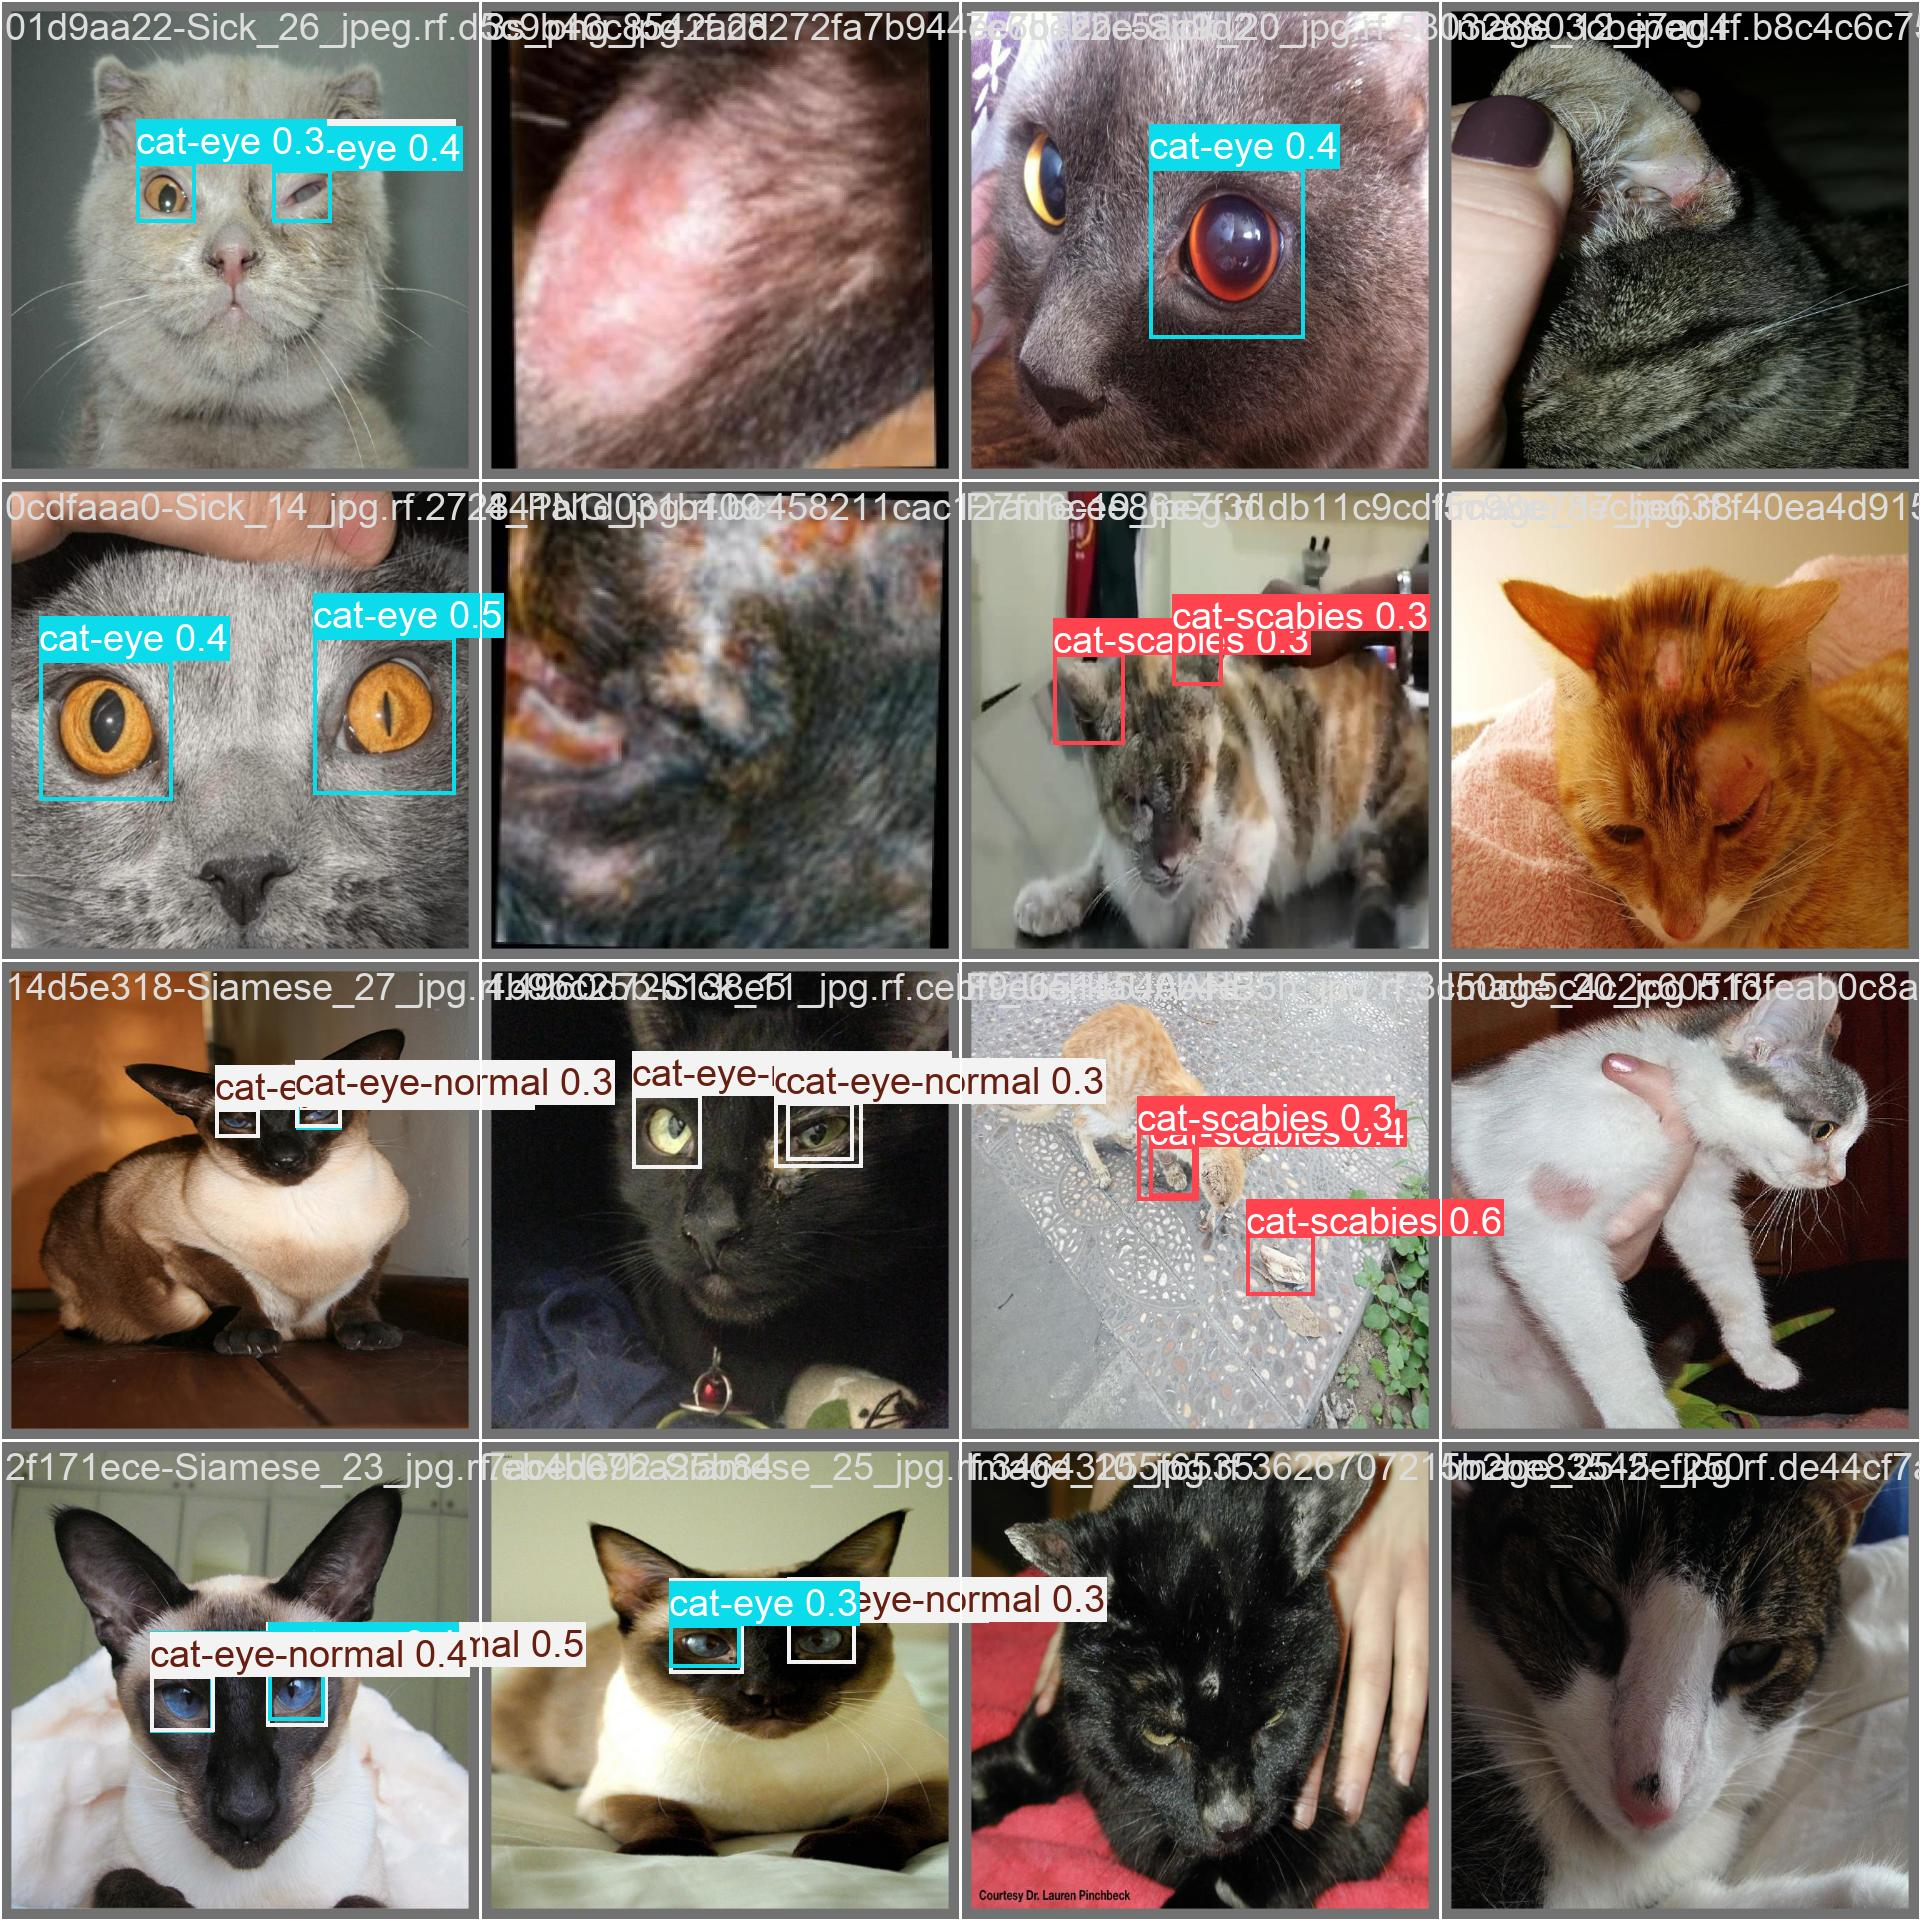

In [17]:
Image("runs/detect/train/val_batch0_pred.jpg", width=600)

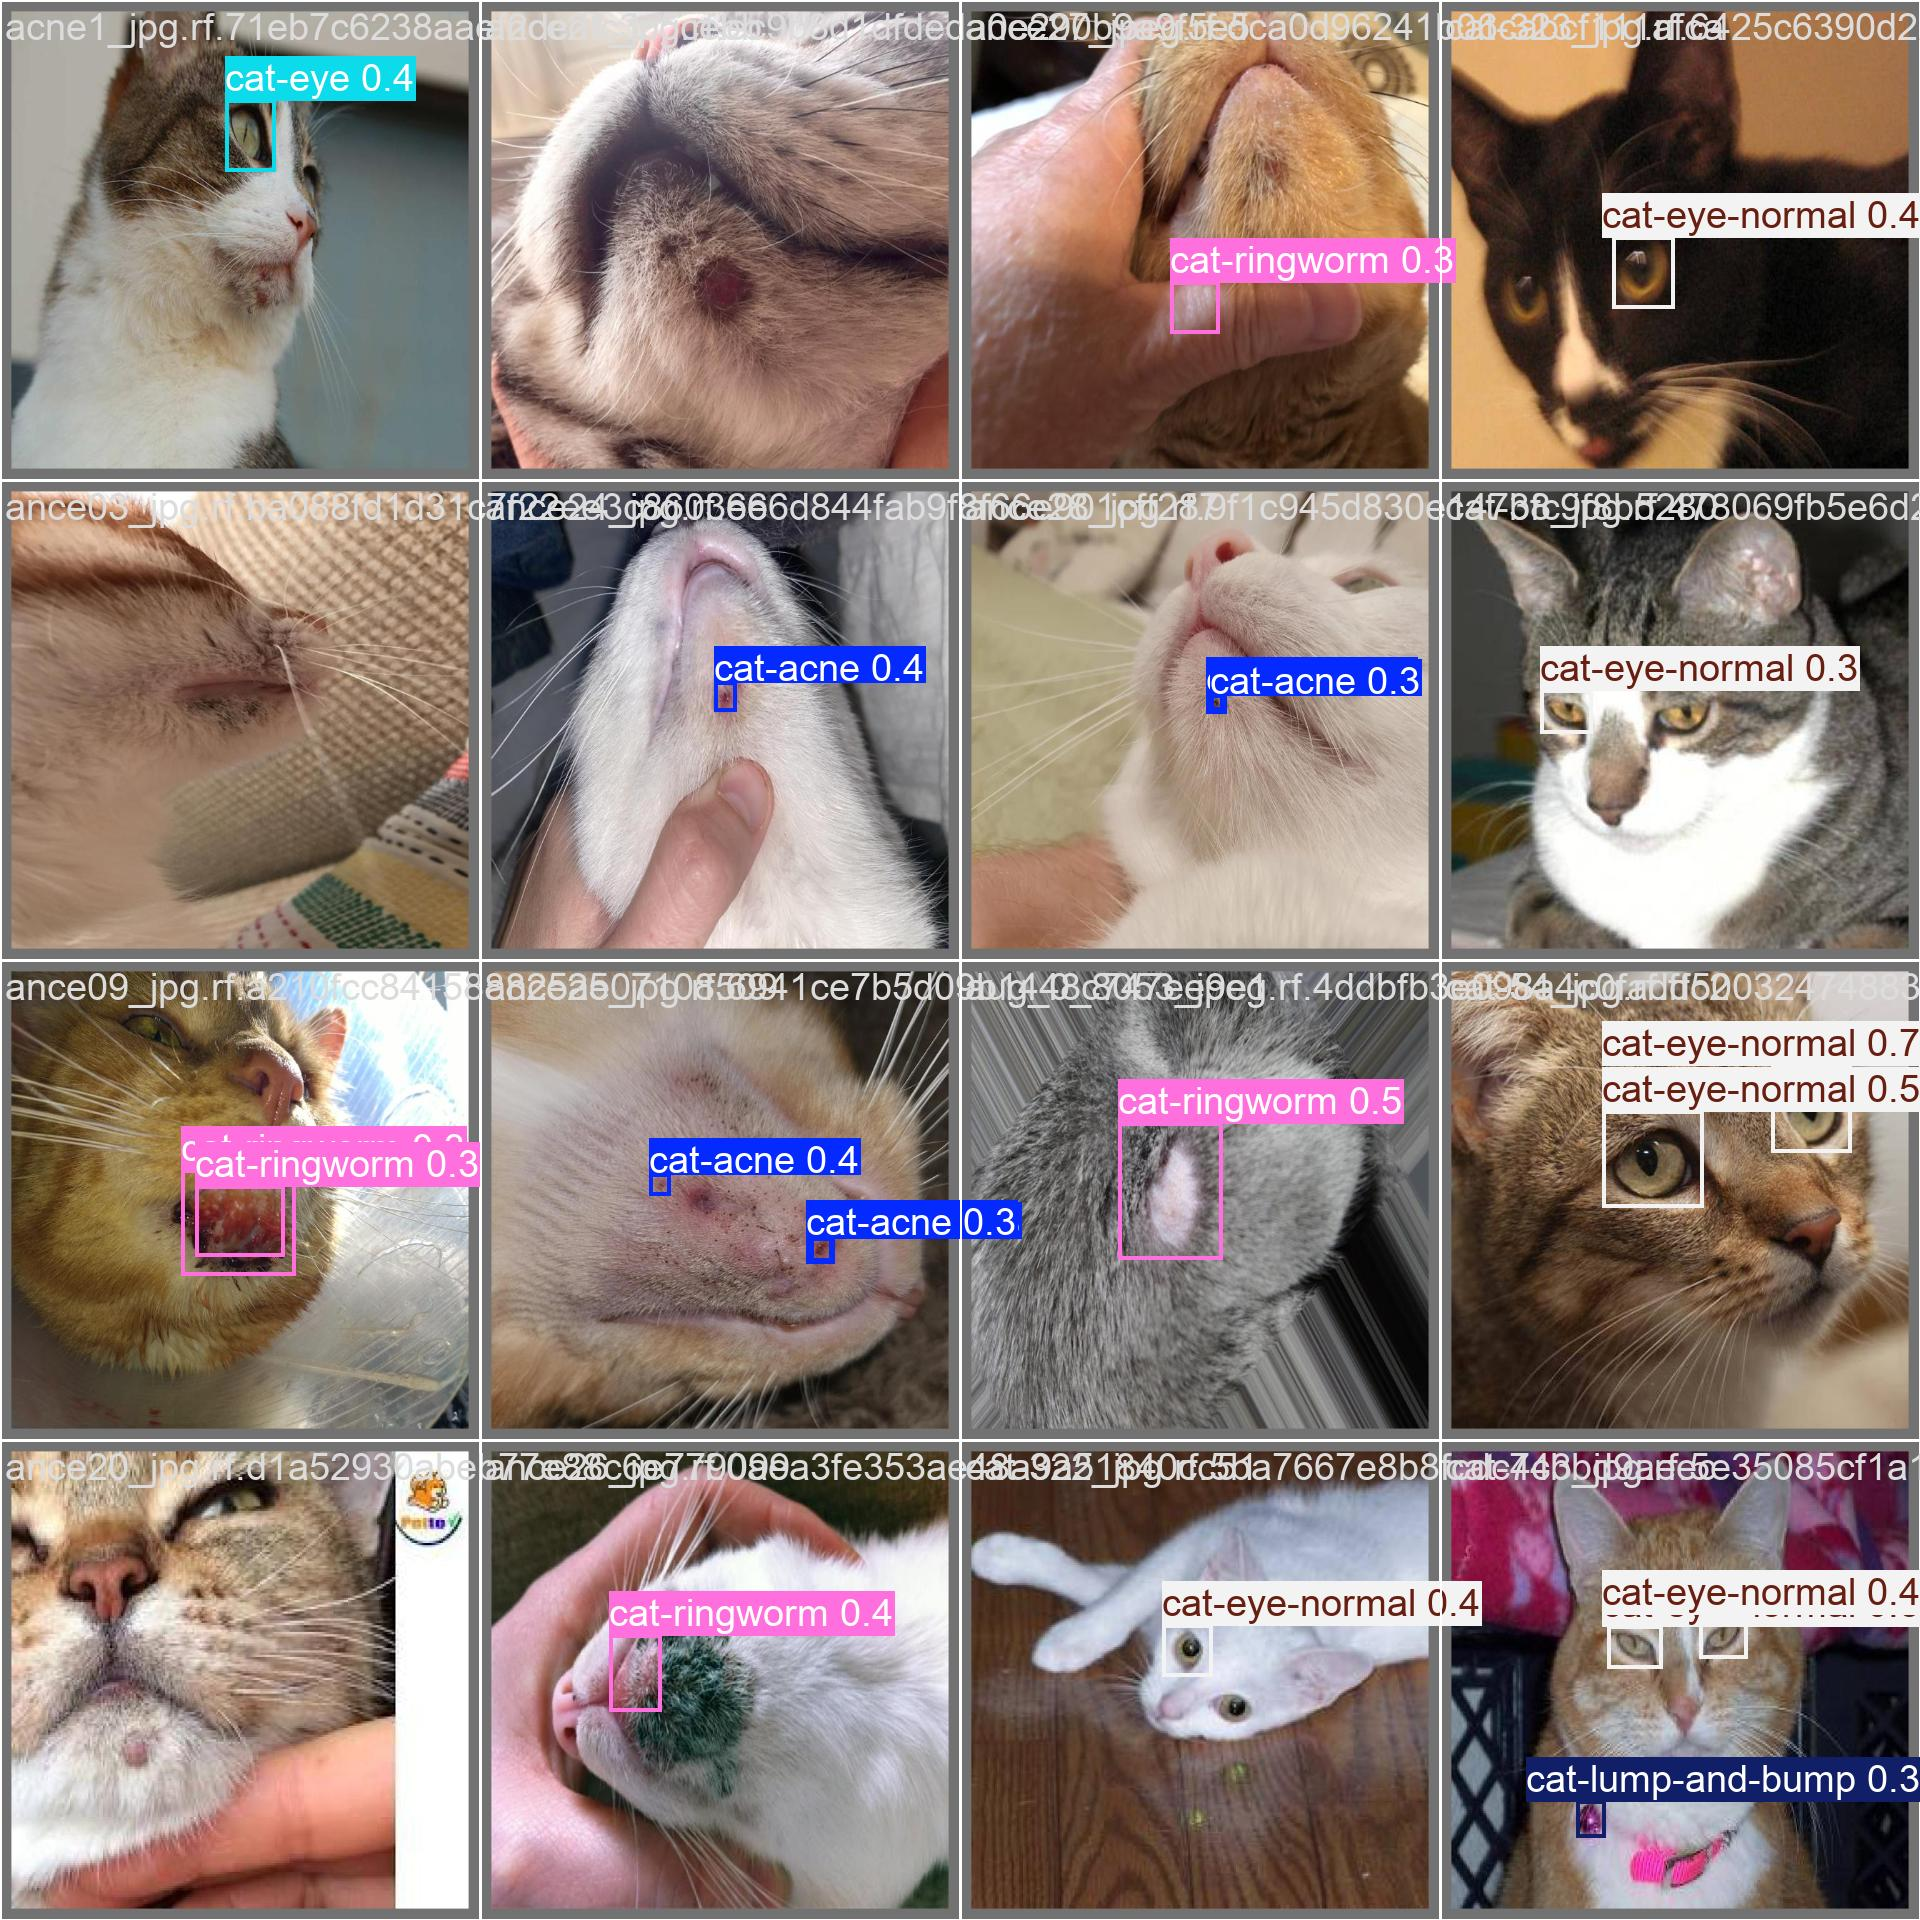

In [18]:
Image("runs/detect/train/val_batch1_pred.jpg", width=600)

In [19]:
!yolo task=detect mode=val model="runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.36 🚀 Python-3.12.7 torch-2.5.1+cpu CPU (Intel Core(TM) i5-10500H 2.50GHz)


val: Scanning D:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\valid\labels.cache... 109 images, 0 backgrounds, 0 corrupt: 100%|██████████| 109/109 [00:00<?, ?it/s]
val: Scanning D:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\valid\labels.cache... 109 images, 0 backgrounds, 0 corrupt: 100%|██████████| 109/109 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:01<00:06,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:02<00:05,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:03<00:04,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4


YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs
                   all        109        195       0.23      0.269        0.2      0.094
              cat-acne         16         26      0.179      0.154     0.0911     0.0289
               cat-eye         17         23      0.344      0.696      0.487      0.234
        cat-eye-normal         14         21      0.341       0.81      0.529       0.33
          cat-hairloss         15         16       0.35      0.188      0.171     0.0546
     cat-lump-and-bump          9         19      0.187      0.105       0.11     0.0393
          cat-ringworm         24         51      0.135     0.0784     0.0843      0.026
           cat-scabies         13         32      0.303      0.125      0.119     0.0366
             cat-ulcer          6          7          0          0    0.00912    0.00275
Speed: 1.3ms preprocess, 59.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\val

### Lanjut examine dengan test images

In [20]:
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True


Ultralytics 8.3.36 🚀 Python-3.12.7 torch-2.5.1+cpu CPU (Intel Core(TM) i5-10500H 2.50GHz)
YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs

image 1/50 d:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\test\images\Image_1-2-_jpg.rf.cd33232ffbc463bfe51a821c774262bb.jpg: 640x640 (no detections), 72.3ms
image 2/50 d:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\test\images\Image_16-5-_jpg.rf.f9ce9b9aaf58c595abf44d6573eb2dfc.jpg: 640x640 (no detections), 57.2ms
image 3/50 d:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\test\images\Image_16_jpg.rf.6af4afe6bb342980aaf85607c2104f6c.jpg: 640x640 (no detections), 56.8ms
image 4/50 d:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\test\images\Image_18_jpg.rf.6167c7d05383ee20bfc732b98a5bda96.jpg: 640x640 1 cat-eye, 58.3ms
image 5/50 d:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\test\images\Image_45-2-_jpg.rf.a4769cad9d1bc2da196e077703e905a6.jpg: 640x64

In [22]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.36 🚀 Python-3.12.7 torch-2.5.1+cpu CPU (Intel Core(TM) i5-10500H 2.50GHz)
YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs
                   all        109        195       0.23      0.269        0.2      0.094
              cat-acne         16         26      0.179      0.154     0.0911     0.0289
               cat-eye         17         23      0.344      0.696      0.487      0.234
        cat-eye-normal         14         21      0.341       0.81      0.529       0.33
          cat-hairloss         15         16       0.35      0.188      0.171     0.0546
     cat-lump-and-bump          9         19      0.187      0.105       0.11     0.0393
          cat-ringworm         24         51      0.135     0.0784     0.0843      0.026
           cat-scabies         13         32      0.303      0.125      0.119     0.0366
             cat-ulcer          6          7          0          0    0.00912    0.00275
Speed: 1.3ms preprocess, 6


val: Scanning D:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\valid\labels.cache... 109 images, 0 backgrounds, 0 corrupt: 100%|██████████| 109/109 [00:00<?, ?it/s]
val: Scanning D:\CODE\GitHub-Repositories\Clones\capstone-catbot\CatBot--4\valid\labels.cache... 109 images, 0 backgrounds, 0 corrupt: 100%|██████████| 109/109 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:01<00:06,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:02<00:05,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:03<00:04,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4

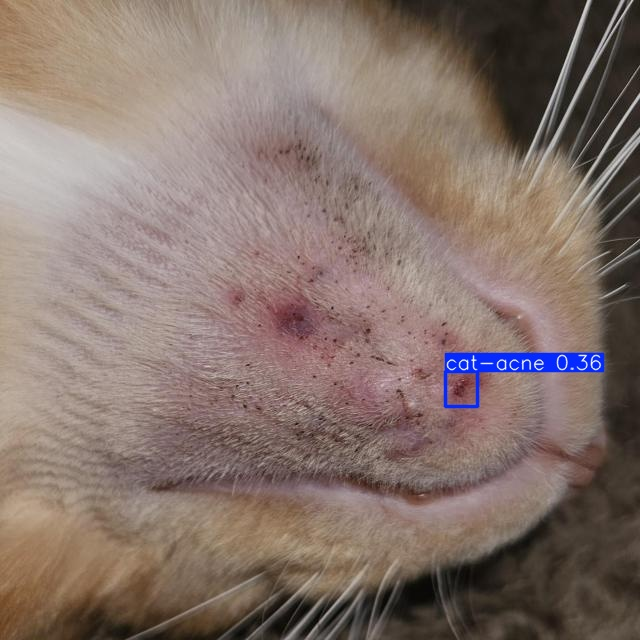

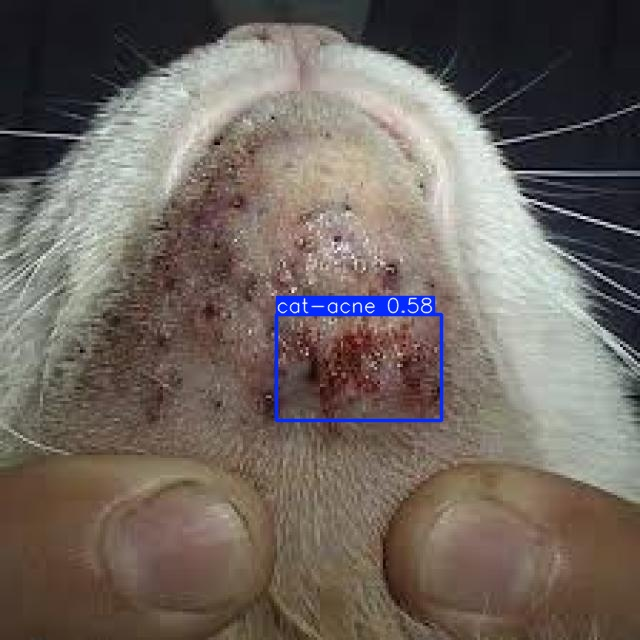

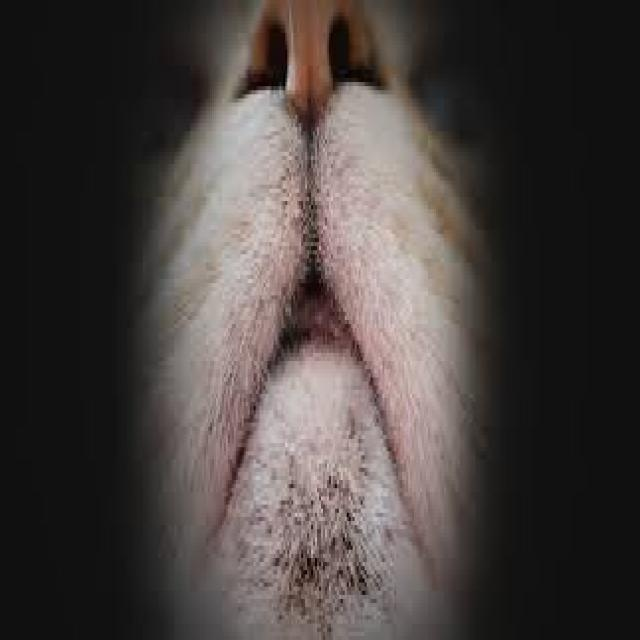

In [24]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!gdown "https://images.ctfassets.net/4dmg3l1sxd6g/vccqyWVj5Rcu2BBiv2QAC/e1d72df90f6dc360b4b2c269dfd5d10f/CI_OralUlceration_Fig-5.png_-_en"

In [26]:
!yolo task=detect mode=predict model= "runs/detect/train/weights/best.pt" conf=0.25 source="sever-feline-dermatitis.jpg" save=True

Ultralytics 8.3.36 🚀 Python-3.12.7 torch-2.5.1+cpu CPU (Intel Core(TM) i5-10500H 2.50GHz)
YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 d:\CODE\GitHub-Repositories\Clones\capstone-catbot\sever-feline-dermatitis.jpg: 544x640 1 cat-ringworm, 72.8ms
Speed: 3.0ms preprocess, 72.8ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs\detect\predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
Image("/content/runs/detect/predict8/test-ulcer.jpg", width=600)